In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import WhatHappened as t
import seaborn as sns




ModuleNotFoundError: No module named 'WhatHappened'

In [118]:
address = 'C:/Users/Jared Guest/Documents/Udacity_Resources/F_listings.csv'

In [119]:
RAW = pd.read_csv(address, index_col=None)
df = RAW[['price','bathrooms','accommodates','number_of_reviews','review_scores_rating','host_acceptance_rate','host_response_rate']]
df.head()

,price,bathrooms,accommodates,number_of_reviews,review_scores_rating,host_acceptance_rate,host_response_rate
0,$80.00,1.0,4,1,100.0,100%,100%
1,$75.00,1.0,3,3,93.0,100%,100%
2,$135.00,1.5,6,0,NaN,100%,100%
3,$120.00,1.0,6,2,60.0,100%,100%
4,$51.00,2.0,6,348,96.0,94%,50%


In [120]:
df.isnull().sum().sum()

5889

#### All Columns with Nans

In [121]:
###most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
###most_missing_cols

In [122]:
##tenPercentMissing = set(df.columns[df.isnull().mean() > 0.01])
##tenPercentMissing

In [123]:
dfnans=df.interpolate(method ='linear', limit_direction ='forward')

In [124]:
dfnans.isnull().sum().sum()

3761

In [128]:
##dfnans.fillna(df.mean(), inplace=True)



### Looking for Mulicolinearilty 

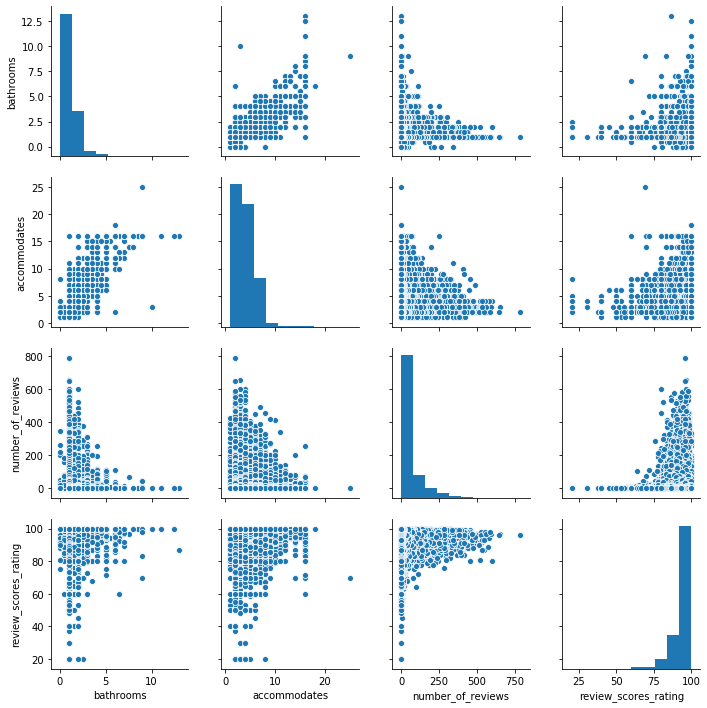

In [129]:
sb.pairplot(dfnans)

In [127]:
print(df.corr())

                      bathrooms  accommodates  number_of_reviews  \
bathrooms              1.000000      0.671412          -0.078040   
accommodates           0.671412      1.000000          -0.057417   
number_of_reviews     -0.078040     -0.057417           1.000000   
review_scores_rating   0.026459     -0.000650           0.077909   

                      review_scores_rating  
bathrooms                         0.026459  
accommodates                     -0.000650  
number_of_reviews                 0.077909  
review_scores_rating              1.000000  


In [135]:
X = dfnans[['bathrooms','accommodates','number_of_reviews','review_scores_rating']] ,##'host_acceptance_rate','host_response_rate']]
y = dfnans['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train) 


ValueError: Found input variables with inconsistent numbers of samples: [1, 12256]